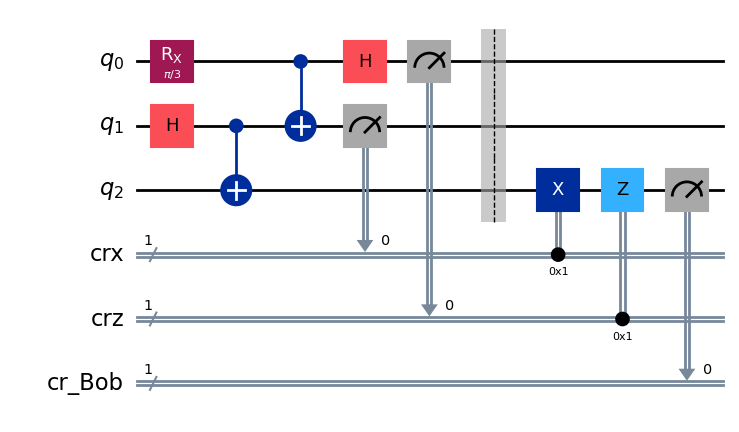

In [2]:
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt
# Qiskitから必要なモジュールをインポート
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit, transpile
from qiskit_aer import AerSimulator  # AerSimulatorを使用
from qiskit.visualization import plot_histogram

# 1つの量子レジスタと、3つの古典レジスタを別々に用意
q = QuantumRegister(3, name="q")
crx = ClassicalRegister(1, name="crx")
crz = ClassicalRegister(1, name="crz")
cr_Bob = ClassicalRegister(1, name="cr_Bob")
qc = QuantumCircuit(q, crx, crz, cr_Bob)

# Alice　が送りたい量子ビットの状態を用意
qc.rx(pi / 3, 0)

# Alice と Bob が共有しているもつれ量子ビット対の準備
qc.h(1)
qc.cx(1, 2)

# Alice が送りたい量子ビットと、自分のもつれ量子ビットを相互作用させる
qc.cx(0, 1)
qc.h(0)

# Aliceの持つ量子ビットを測定
qc.measure(0, crz)
qc.measure(1, crx)
qc.barrier()

# Aliceから送られた測定結果より、Bobの操作を決める
def decode_Bob(qc):
    qc.x(2).c_if(crx, 1)
    qc.z(2).c_if(crz, 1)

decode_Bob(qc)
qc.measure(2, cr_Bob)

qc.draw('mpl')  # 量子回路を描画


{'1 0 1': 63, '1 0 0': 66, '1 1 0': 61, '1 1 1': 63, '0 1 1': 189, '0 0 1': 211, '0 1 0': 197, '0 0 0': 174}


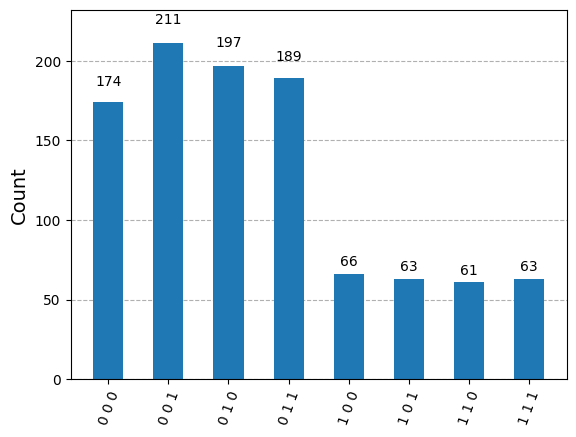

In [3]:

# AerSimulatorを使用して実行
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
result = simulator.run(compiled_circuit, shots=1024).result()

# 結果を取得して表示
answer = result.get_counts()
print(answer)
plot_histogram(answer)


In [4]:

# 確率計算
count_zero = 0
count_one = 0
keys = list(answer.keys())
for key in keys:
    if key[0] == '0':
        count_zero += answer[key]
    else:
        count_one += answer[key]
        
print("probability of |0>:{:.3f}".format(count_zero / 1024))
print("probability of |1>:{:.3f}".format(count_one / 1024))


probability of |0>:0.753
probability of |1>:0.247


{'0 1': 1024}


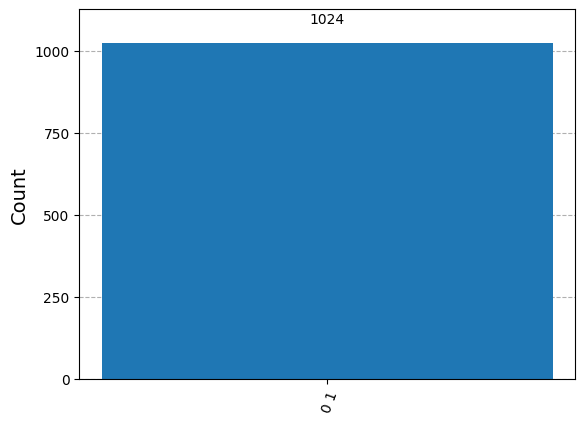

In [5]:

# 新しい回路
q = QuantumRegister(2, name="q")
c1 = ClassicalRegister(1, name="c1")
c2 = ClassicalRegister(1, name="c2")
qc = QuantumCircuit(q, c1, c2)

# Alice と Bob が共有しているもつれ量子ビット対の準備
qc.x(0)

qc.measure(0, c1)
qc.barrier()

# Aliceから送られた測定結果よりBobの操作を決める
def decode_Bob(qc):
    qc.x(q[1]).c_if(c1, 0)

decode_Bob(qc)
qc.measure(1, c2)

qc.draw('mpl')  # 量子回路を描画

# AerSimulatorを使用して実行
compiled_circuit = transpile(qc, simulator)
result = simulator.run(compiled_circuit, shots=1024).result()

# 結果を取得して表示
answer = result.get_counts()
print(answer)
plot_histogram(answer)
